# 1. Thought Experiment

In [9]:
import random
import os
from collections import Counter
import matplotlib.pyplot as plt
from secrets import randbelow

# Function to generate random numbers with variable digit length
def generate_random_numbers(count, num_digits=8, crypto=False):
    numbers = []
    random_func = randbelow if crypto else lambda x: random.randint(0, x-1)
    
    for _ in range(count):
        # Each number is formatted to have a specified number of digits with leading zeros
        number = f"{random_func(10**num_digits):0{num_digits}}"
        numbers.append(number)
    
    return numbers


In [10]:
from collections import Counter

def print_counts(numbers):
    # Count the frequency of each number
    frequency = Counter(numbers)

    # Initialize counts for different duplicate categories
    duplicate_counts = {f'{i} duplicates': 0 for i in range(11)}

    # Categorize the counts
    for count in frequency.values():
        if count == 1:
            duplicate_counts['0 duplicates'] += 1
        else:
            # If there are more than 10 duplicates, group them into the '10 duplicates' category
            duplicates_key = f'{min(count - 1, 10)} duplicates'
            duplicate_counts[duplicates_key] += 1

    # Total numbers including duplicates
    total_numbers = len(numbers)

    print(f"Total number of entries: {total_numbers:,}")
    for key in sorted(duplicate_counts.keys(), key=lambda x: int(x.split()[0])):
        print(f"Number of {key}: {duplicate_counts[key]:,}")


In [17]:
import matplotlib.pyplot as plt
from collections import Counter

def graph_simple_pie_chart(numbers):
    # Count the frequency of each number
    frequency = Counter(numbers)
    
    # Counts for unique numbers and numbers with duplicates
    unique_count = sum(1 for count in frequency.values() if count == 1)
    duplicate_count = len(numbers) - unique_count

     # Labels and sizes for the pie chart
    labels = ['Unique Numbers', 'Duplicates']
    sizes = [unique_count, duplicate_count]
    
    colors = [
        (179/255, 163/255, 105/255),  # Gold
        (0/255, 48/255, 87/255)       # Navy Blue
    ]
    
    explode = (0.1, 0)
    
    # Plot
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Unique Numbers vs Duplicates')
    plt.show()


In [12]:
import matplotlib.pyplot as plt
from collections import Counter

def graph_duplicates_pie_chart(numbers):
    # Count the frequency of each number
    frequency = Counter(numbers)
    # Subtract 1 from the count to get the number of duplicates
    duplicate_counts = Counter(count - 1 for count in frequency.values())

    # Initialize the categories
    categories = {
        '0 duplicates': 0,
        '1 duplicate': 0,
        '2 duplicates': 0,
        '3 or more duplicates': 0
    }

    # Categorize the counts into the defined ranges
    for duplicates, num_occurrences in duplicate_counts.items():
        if duplicates == 0:
            categories['0 duplicates'] += num_occurrences
        elif duplicates == 1:
            categories['1 duplicate'] += num_occurrences
        elif duplicates == 2:
            categories['2 duplicates'] += num_occurrences
        elif duplicates >= 3:
            categories['3 or more duplicates'] += num_occurrences

    # Data to plot
    labels = categories.keys()
    sizes = categories.values()
    colors = plt.cm.Paired(range(len(labels)))
    
    # Specify the explode values - all slices are exploded equally here
    explode = (0.1,) * len(categories)  # Explode all slices equally

    # Plot
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    plt.title('Pie Chart of Duplicate Number Counts')

    # Show the plot
    plt.show()


In [13]:
use_crypto_random=False

print("Generating random numbers...")
numbers = generate_random_numbers(10**6, num_digits=6, crypto=use_crypto_random)

print("Sorting numbers...")
sorted_numbers = sorted(numbers)

Generating random numbers...
Sorting numbers...


In [14]:
print_counts(sorted_numbers)

Total number of entries: 1,000,000
Number of 0 duplicates: 367,487
Number of 1 duplicates: 183,389
Number of 2 duplicates: 61,526
Number of 3 duplicates: 15,503
Number of 4 duplicates: 3,084
Number of 5 duplicates: 517
Number of 6 duplicates: 74
Number of 7 duplicates: 12
Number of 8 duplicates: 1
Number of 9 duplicates: 0
Number of 10 duplicates: 0


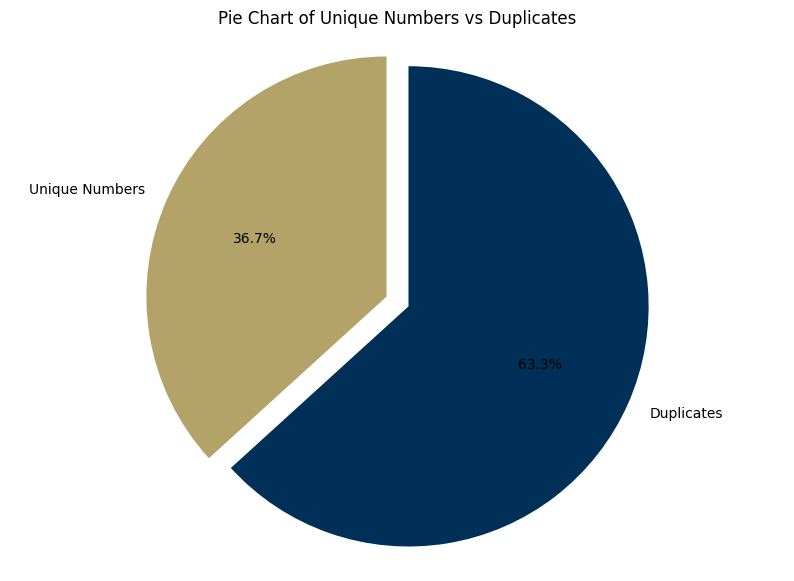

In [18]:
graph_simple_pie_chart(sorted_numbers)

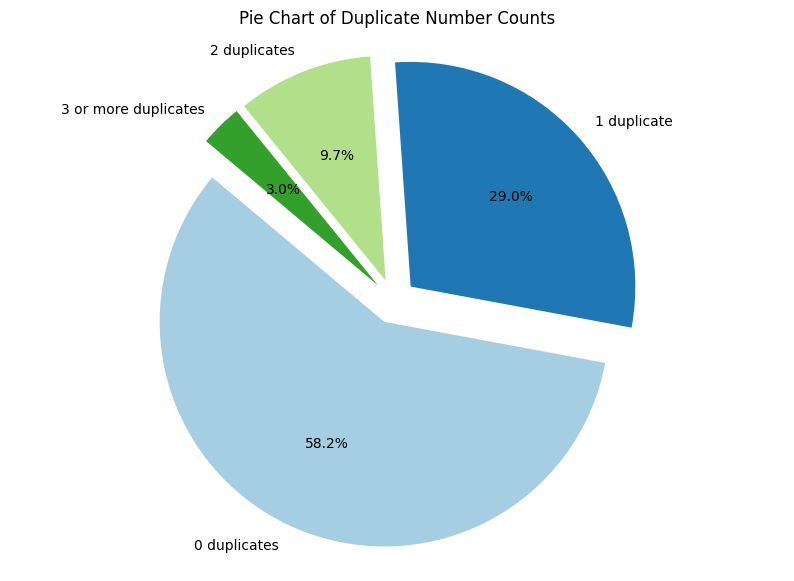

In [16]:
graph_duplicates_pie_chart(sorted_numbers)